<a href="https://colab.research.google.com/github/Bhavesh09102/Smart-agricultural-optimizing-engine/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib as plt
import numpy as np
from sklearn import datasets,linear_model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Crop_recommendation.csv to Crop_recommendation.csv


In [3]:
crop = list(uploaded.keys())[0]
crop_data= pd.read_csv(crop)


dropping rows with missing values

In [4]:
crop_data = crop_data.dropna()


Removing non numeric column here it is "Label"

In [5]:
for column in crop_data.columns[:-1]:  # Exclude the 'label' column
    crop_data[column] = pd.to_numeric(crop_data[column], errors='coerce')

Encode the 'Label' column

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
label_encoder = LabelEncoder()
crop_data['label'] = label_encoder.fit_transform(crop_data['label'])

Select important features and target


In [12]:
important_features = ['N', 'P', 'K', 'temperature', 'humidity', 'rainfall']
features = crop_data[important_features]
target = crop_data['label']

Scale the features

In [13]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


 Split the dataset into training and testing sets

In [14]:
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# LINEAR REGRESSION

Training the model

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

Predict using the Linear Regression model

In [17]:
y_pred_train_linear = linear_model.predict(X_train)
y_pred_test_linear = linear_model.predict(X_test)

Calculate accuracy (R^2 score)

In [18]:
train_accuracy_linear = r2_score(y_train, y_pred_train_linear)
test_accuracy_linear = r2_score(y_test, y_pred_test_linear)

print('Linear Regression Train R^2 Score:', train_accuracy_linear)
print('Linear Regression Test R^2 Score:', test_accuracy_linear)

Linear Regression Train R^2 Score: 0.30160861777729575
Linear Regression Test R^2 Score: 0.2534669045864427


# LOGISTIC REGRESSION

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Train the Logistic Regression model

In [20]:
logistic_model = LogisticRegression(max_iter=200)
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

Predict using the Logistic Regression model

In [21]:
y_pred_train_logistic = logistic_model.predict(X_train)
y_pred_test_logistic = logistic_model.predict(X_test)

Calculate Accuracy

In [22]:
train_accuracy_logistic = accuracy_score(y_train, y_pred_train_logistic)
test_accuracy_logistic = accuracy_score(y_test, y_pred_test_logistic)

print('Logistic Regression Train Accuracy:', train_accuracy_logistic)
print('Logistic Regression Test Accuracy:', test_accuracy_logistic)

Logistic Regression Train Accuracy: 0.9789772727272728
Logistic Regression Test Accuracy: 0.9636363636363636


# NEURAL NETWORK

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score

Build the model

In [24]:
nn = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

Compile the  model

In [25]:
nn.compile(optimizer='adam', loss='mean_squared_error')

Train the model

In [26]:
history = nn.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test))

Epoch 1/200
55/55 [==============================] - 1s 7ms/step - loss: 135.0818 - val_loss: 109.5049
Epoch 2/200
55/55 [==============================] - 0s 3ms/step - loss: 75.4458 - val_loss: 43.8847
Epoch 3/200
55/55 [==============================] - 0s 3ms/step - loss: 29.1392 - val_loss: 27.6217
Epoch 4/200
55/55 [==============================] - 0s 3ms/step - loss: 22.4342 - val_loss: 24.4049
Epoch 5/200
55/55 [==============================] - 0s 3ms/step - loss: 20.0281 - val_loss: 21.9958
Epoch 6/200
55/55 [==============================] - 0s 4ms/step - loss: 18.1399 - val_loss: 20.0388
Epoch 7/200
55/55 [==============================] - 0s 3ms/step - loss: 16.6633 - val_loss: 18.4227
Epoch 8/200
55/55 [==============================] - 0s 3ms/step - loss: 15.4564 - val_loss: 17.1583
Epoch 9/200
55/55 [==============================] - 0s 3ms/step - loss: 14.5769 - val_loss: 16.1382
Epoch 10/200
55/55 [==============================] - 0s 3ms/step - loss: 13.8807 - val_l

 Predict

In [27]:
y_pred_train_nn = nn.predict(X_train)
y_pred_test_nn = nn.predict(X_test)

14/14 [==============================] - 0s 3ms/step


Evaluation of the neural network model

In [28]:
print('Neural Network:')
print(f'Training RMSE: {mean_squared_error(y_train, y_pred_train_nn, squared=False)}')
print(f'Testing RMSE: {mean_squared_error(y_test, y_pred_test_nn, squared=False)}')
print(f'Training R2 Score: {r2_score(y_train, y_pred_train_nn)}')
print(f'Testing R2 Score: {r2_score(y_test, y_pred_test_nn)}')

Neural Network:
Training RMSE: 1.2633348472315928
Testing RMSE: 1.6712800589543824
Training R2 Score: 0.9598203272157663
Testing R2 Score: 0.934004765970148


# Graph

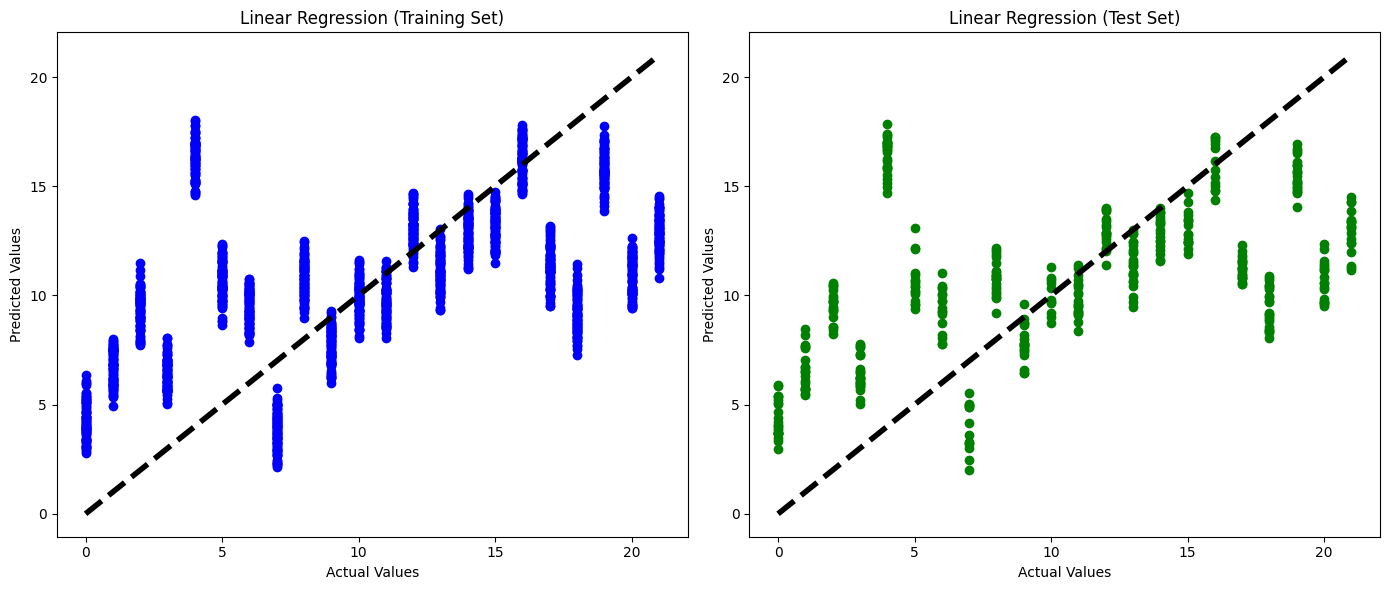

In [29]:
import matplotlib.pyplot as plt

# Plotting the results for the training set
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train_linear, color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
plt.title('Linear Regression (Training Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Plotting the results for the test set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test_linear, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.title('Linear Regression (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train the Logistic Regression model
logistic_model = LogisticRegression(max_iter=200)
logistic_model.fit(X_train, y_train)

# Predict using the Logistic Regression model
y_pred_train_logistic = logistic_model.predict(X_train)
y_pred_test_logistic = logistic_model.predict(X_test)

# Calculate accuracy
train_accuracy_logistic = accuracy_score(y_train, y_pred_train_logistic)
test_accuracy_logistic = accuracy_score(y_test, y_pred_test_logistic)

print('Logistic Regression Train Accuracy:', train_accuracy_logistic)
print('Logistic Regression Test Accuracy:', test_accuracy_logistic)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score

# Build the model
nn = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

# Compile the model
nn.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = nn.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test))

# Predict
y_pred_train_nn = nn.predict(X_train)
y_pred_test_nn = nn.predict(X_test)

# Evaluation of the neural network model
train_rmse_nn = mean_squared_error(y_train, y_pred_train_nn, squared=False)
test_rmse_nn = mean_squared_error(y_test, y_pred_test_nn, squared=False)
train_r2_nn = r2_score(y_train, y_pred_train_nn)
test_r2_nn = r2_score(y_test, y_pred_test_nn)

print('Neural Network:')
print(f'Training RMSE: {train_rmse_nn}')
print(f'Testing RMSE: {test_rmse_nn}')
print(f'Training R2 Score: {train_r2_nn}')
print(f'Testing R2 Score: {test_r2_nn}')
